In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl

In [6]:
t=pd.read_excel(r"E:\RH\定投\PE轮动\指数行情序列.xlsx",header=[0,1], skipfooter=2)

In [7]:
t.head()

PB                                                         PE  \
Time        医药(中信)   沪深300   中证500  沪股通 上证房地产指数 食品饮料(中信)    恒生指数 港股通   医药(中信)   
2008-04-30  5.0686  4.4117  3.7410  0.0  4.1702   9.2215  2.7145   0  43.7761   
2008-05-09  5.2257  4.2853  3.8280  0.0  3.9834   9.1151  2.6179   0  46.8354   
2008-05-16  5.5464  4.3060  3.9142  0.0  3.9804   9.4989  2.6907   0  49.6161   
2008-05-23  5.1373  4.1223  3.6894  0.0  3.5391   8.8390  2.5874   0  45.9366   
2008-05-30  5.1040  4.1004  3.6192  0.0  3.4605   8.6004  2.5753   0  45.7512   

                    ...     Chg           w                                   \
Time          沪深300 ...    恒生指数  港股通 医药(中信) 沪深300 中证500 沪股通 上证房地产指数 食品饮料(中信)   
2008-04-30  27.5079 ... -0.6128  0.0    NaN   NaN   NaN NaN     NaN      NaN   
2008-05-09  26.7053 ... -1.5191  0.0    NaN   NaN   NaN NaN     NaN      NaN   
2008-05-16  26.7902 ...  0.4121  0.0    NaN   NaN   NaN NaN     NaN      NaN   
2008-05-23  25.6256 ... -1.3139  0.0    NaN   NaN   NaN NaN     NaN      NaN   
2008-05-30  25.3889 ...  0.6116  0.0    NaN   NaN   NaN NaN     NaN      NaN   

                     
Time       恒生指数 港股通  
2008-04-30  NaN NaN  
2008-05-09  NaN NaN  
2008-05-16  NaN NaN  
2008-05-23  NaN NaN  
2008-05-30  NaN NaN  

[5 rows x 64 columns]

In [4]:
#pd.Timestamp(2008,12,31)
t=t.drop(columns=['港股通'],level=1)

In [5]:
l=list(t.columns.levels[1])
l.remove('港股通')
indexs=l

In [6]:
l

['上证房地产指数', '中证500', '医药(中信)', '恒生指数', '沪深300', '沪股通', '食品饮料(中信)']

In [6]:
t.T.xs('沪深300',level=1).T.corr()

,PB,PE,PCF,PS,Close,Dividend rate,Chg,w
PB,1.000000,0.913062,0.445651,0.942151,0.214669,-0.841049,0.007950,NaN
PE,0.913062,1.000000,0.305001,0.964352,0.407320,-0.825014,-0.010541,NaN
PCF,0.445651,0.305001,1.000000,0.375873,0.069465,-0.391243,0.022597,NaN
PS,0.942151,0.964352,0.375873,1.000000,0.463022,-0.899709,-0.015487,NaN
Close,0.214669,0.407320,0.069465,0.463022,1.000000,-0.544988,-0.026331,NaN
Dividend rate,-0.841049,-0.825014,-0.391243,-0.899709,-0.544988,1.000000,0.008755,NaN
Chg,0.007950,-0.010541,0.022597,-0.015487,-0.026331,0.008755,1.000000,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


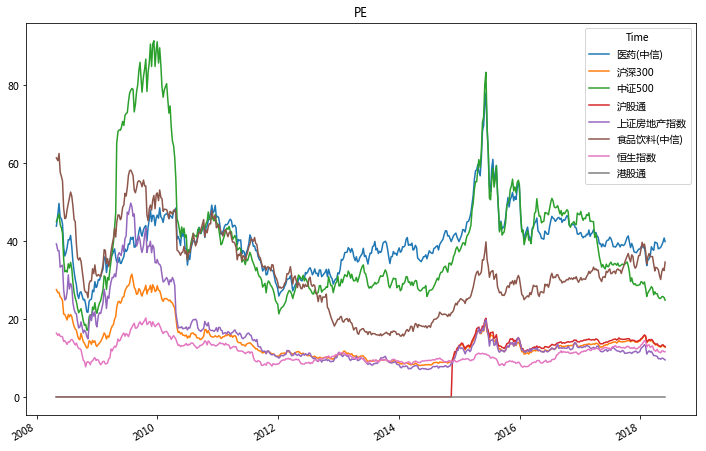

In [349]:
t['PE'].plot(figsize=(12,8))
plt.title('PE')
plt.savefig('E:\RH\PE.png',dpi=144)

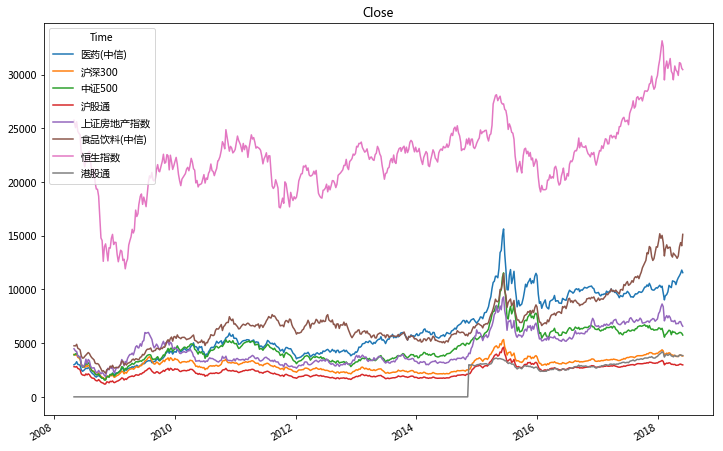

In [350]:
t['Close'].plot(figsize=(12,8))
plt.title('Close')
plt.savefig('E:\RH\Close.png',dpi=144)

In [220]:
for index in indexs: #计算移动平均线
    t['AveClose',index]=t['Close',index].rolling(5).mean()

In [295]:
for index in indexs: #计算相对PE
    t['rPE',index]=t['PE'][index]/t['PE',index][0]   
    t.loc[26:,('rPE',index)]=t['PE'][index]/t['PE',index].shift(26)

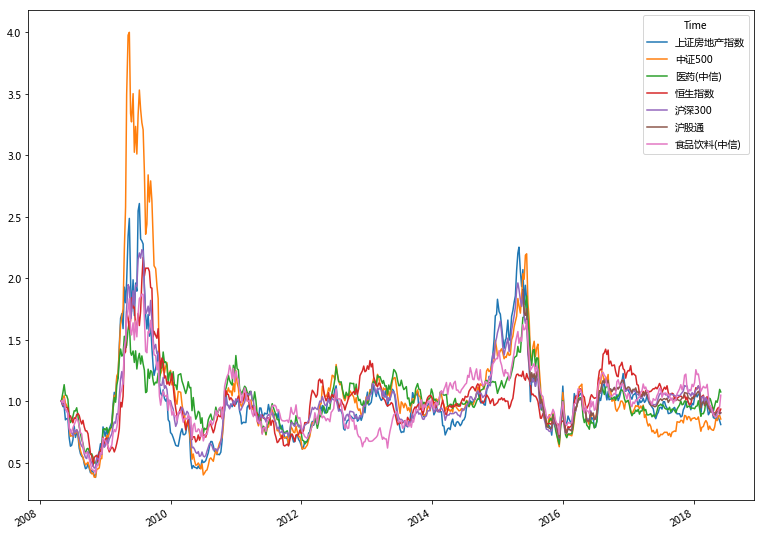

In [328]:
t['rPE'].plot(figsize=(13,10))
plt.savefig(r'E:\RH\rPE.png',dpi=144)

In [227]:
t.loc[337:,('rPE','沪股通')]=t['PE']['沪股通'][337:]/t['PE']['沪股通'][pd.Timestamp(2014,11,21)]

In [246]:
t['rPE'].rank(axis=1)

Time,上证房地产指数,中证500,医药(中信),恒生指数,沪深300,沪股通,食品饮料(中信)
2008-04-30,3.5,3.5,3.5,3.5,3.5,NaN,3.5
2008-05-09,1.0,5.0,6.0,2.0,3.0,NaN,4.0
2008-05-16,1.0,5.0,6.0,3.0,2.0,NaN,4.0
2008-05-23,1.0,5.0,6.0,4.0,2.0,NaN,3.0
2008-05-30,1.0,5.0,6.0,4.0,2.0,NaN,3.0
2008-06-06,1.0,4.0,6.0,5.0,2.0,NaN,3.0
2008-06-13,1.0,3.0,6.0,5.0,2.0,NaN,4.0
2008-06-20,1.0,2.0,5.0,6.0,4.0,NaN,3.0
2008-06-27,1.0,2.0,5.0,6.0,3.0,NaN,4.0
2008-07-04,1.0,2.0,6.0,5.0,3.0,NaN,4.0


In [80]:
t['index'] = np.arange(len(t)) % frequency
t['chg_pos']=t['index']==0
t['chg_pos'].astype(int, inplace=True)
#t.replace(0,np.nan,inplace=True)
t

PB                                                        PE  \
Time        医药(中信)   沪深300   中证500     沪股通 上证房地产指数 食品饮料(中信)    恒生指数   医药(中信)   
2008-04-30  5.0686  4.4117  3.7410     NaN  4.1702   9.2215  2.7145  43.7761   
2008-05-09  5.2257  4.2853  3.8280     NaN  3.9834   9.1151  2.6179  46.8354   
2008-05-16  5.5464  4.3060  3.9142     NaN  3.9804   9.4989  2.6907  49.6161   
2008-05-23  5.1373  4.1223  3.6894     NaN  3.5391   8.8390  2.5874  45.9366   
2008-05-30  5.1040  4.1004  3.6192     NaN  3.4605   8.6004  2.5753  45.7512   
2008-06-06  4.9537  3.9841  3.5027     NaN  3.4772   8.4148  2.5618  44.3605   
2008-06-13  4.3012  3.4462  2.9463     NaN  2.8397   7.3674  2.3751  38.4760   
2008-06-20  4.0458  3.4754  2.6740     NaN  2.5575   7.0440  2.4001  36.1173   
2008-06-27  4.1400  3.3857  2.6981     NaN  2.5912   7.0819  2.3274  36.9420   
2008-07-04  4.3613  3.2376  2.8754     NaN  2.7715   7.3655  2.2536  38.3246   
2008-07-11  4.5756  3.4693  3.0575     NaN  3.2242   7.5934  2.3594  40.3106   
2008-07-18  4.4776  3.3697  2.9363     NaN  2.8481   7.8238  2.3312  40.2570   
2008-07-25  4.6215  3.4714  3.0961     NaN  3.1802   8.0546  2.4146  41.4000   
2008-08-01  4.4920  3.3977  2.9762     NaN  3.0367   7.8916  2.4403  38.5653   
2008-08-08  4.0558  3.1677  2.6268     NaN  2.6218   7.4984  2.3348  34.6991   
2008-08-15  3.8321  2.9819  2.3890     NaN  2.4215   7.1450  2.2349  32.1599   
2008-08-22  3.6219  2.9113  2.2926     NaN  2.4242   6.8861  2.1597  30.1396   
2008-08-29  3.4544  2.8732  2.2117     NaN  2.4221   6.4885  2.2239  28.7336   
2008-09-05  3.1980  2.6267  2.0596     NaN  2.1789   5.8558  2.0811  26.1936   
2008-09-12  3.0803  2.4826  1.9531     NaN  2.0027   5.7613  1.9906  25.2297   
2008-09-19  3.2588  2.4576  2.0001     NaN  2.0309   5.8576  1.9847  26.6921   
2008-09-26  3.2914  2.7366  2.0478     NaN  2.1814   5.7140  1.9260  26.9586   
2008-10-10  3.0317  2.3775  1.7600     NaN  1.8693   4.9371  1.4995  24.8607   
2008-10-17  2.9216  2.3099  1.6525     NaN  1.9549   4.5016  1.4690  25.0137   
2008-10-24  2.9060  2.1743  1.6602     NaN  1.8918   4.5452  1.2477  23.8078   
2008-10-31  2.6809  1.9865  1.4823     NaN  1.6869   4.2752  1.3866  21.7797   
2008-11-07  2.6694  2.0196  1.4807     NaN  1.6189   4.0525  1.4124  21.6862   
2008-11-14  3.0196  2.2830  1.7708     NaN  2.0089   4.6251  1.3786  24.5310   
2008-11-21  3.0697  2.2607  1.8205     NaN  2.2808   4.7477  1.2901  24.9379   
2008-11-28  3.0840  2.1483  1.7443     NaN  2.1299   4.7413  1.4241  25.0602   
...            ...     ...     ...     ...     ...      ...     ...      ...   
2017-11-10  4.5131  1.6751  2.7253  1.6008  1.6475   6.0535  1.2693  39.3378   
2017-11-17  4.4105  1.6787  2.6101  1.5980  1.6935   5.9769  1.2575  38.4992   
2017-11-24  4.2491  1.6811  2.5696  1.5956  1.7090   5.6074  1.2854  37.1973   
2017-12-01  4.2101  1.6401  2.5873  1.5687  1.7329   5.4713  1.2526  37.0576   
2017-12-08  4.2025  1.6387  2.5441  1.5629  1.7225   5.5349  1.2478  36.9817   
2017-12-15  4.2526  1.6336  2.4459  1.5627  1.6707   5.7712  1.2583  37.4369   
2017-12-22  4.2760  1.6626  2.4493  1.5850  1.6941   5.9947  1.2913  37.8703   
2017-12-29  4.2226  1.6668  2.4531  1.5917  1.7196   6.0019  1.3021  37.9031   
2018-01-05  4.2785  1.7086  2.5198  1.6315  1.8377   6.2521  1.3483  38.4056   
2018-01-12  4.3138  1.7397  2.5120  1.6522  1.8783   6.5632  1.3764  38.8608   
2018-01-19  4.2408  1.7904  2.4683  1.6969  1.9247   6.3682  1.4200  38.1877   
2018-01-26  4.2607  1.8337  2.5066  1.7349  1.9892   6.4811  1.4696  38.6138   
2018-02-02  3.9946  1.8101  2.3566  1.7068  1.9295   6.1747  1.4451  36.2223   
2018-02-09  3.7135  1.6206  2.1767  1.5361  1.6292   5.6448  1.2963  33.6537   
2018-02-14  3.8529  1.6581  2.2519  1.5662  1.6839   5.8801  1.3393  34.9015   
2018-02-23  3.9082  1.7061  2.3071  1.6118  1.7445   6.0599  1.3782  35.4253   
2018-03-02  3.9988  1.6668  2.3491  1.5908  1.6969   5.9163  1.3296  36.0718   
2018-03-09  4.29

In [1]:
index_amount = 3
frequency = 3
rank=t['rPE'].rank(axis=1)
#赋权重(仓位)
for index in indexs:
    t['rank',index]=rank[index]
    t['w',index] = t['rank',index].apply(lambda x: 1/index_amount if x<index_amount else 0) 
    for i in range(len(t.index)):
        if t['chg_pos'][t.index[i]]:
            t.loc[t.index[i],('longerw',index)] = t['w',index][t.index[i]]
        else:
            t.loc[t.index[i],('longerw',index)] = t['w',index][t.index[i-t['index'][t.index[i]]]]
#t['w'][0]=[0,0,0,0,0,0,0]
    #t.where()
#设置止损
#如果该市场指数下跌跌破均线，则止损
for index in indexs:
    t.loc[(t['Close',index]<t['AveClose',index]) & (t['Close',index]<t['Close',index].shift(2)),
          ('w',index)] = 0
#如果市场指数上穿均线，则开仓

NameError: name 't' is not defined

In [302]:
#计算收益
for index in indexs:
    #t['worth',index] = (principal/t['Close',index] - principal/t['Close',index].shift(1)) *t['w',index]
    t['worth',index] = (t['Close',index].shift(-1)/t['Close',index]-1) * t['w',index]
#计算累计收益
#t['cum_profit'] = t['worth'].T.sum().cumsum() 

t['cum_profit_single'] = 1 + (t['worth'].T.sum()).cumsum() 
t['cum_profit_compound'] = (t['worth'].T.sum()+1).cumprod() 

#计算收益
for index in indexs:
    #t['worth',index] = (principal/t['Close',index] - principal/t['Close',index].shift(-1) ) *t['w',index]
    t['longer_worth',index] = (t['Close',index].shift(-1)/t['Close',index]-1) * t['longerw',index]
#计算累计收益
#t['cum_profit'] = t['worth'].T.sum().cumsum() 

t['cum_profit_single_longer'] = 1 + (t['longer_worth'].T.sum()).cumsum() 
t['cum_profit_compound_longer'] = (t['longer_worth'].T.sum()+1).cumprod() 

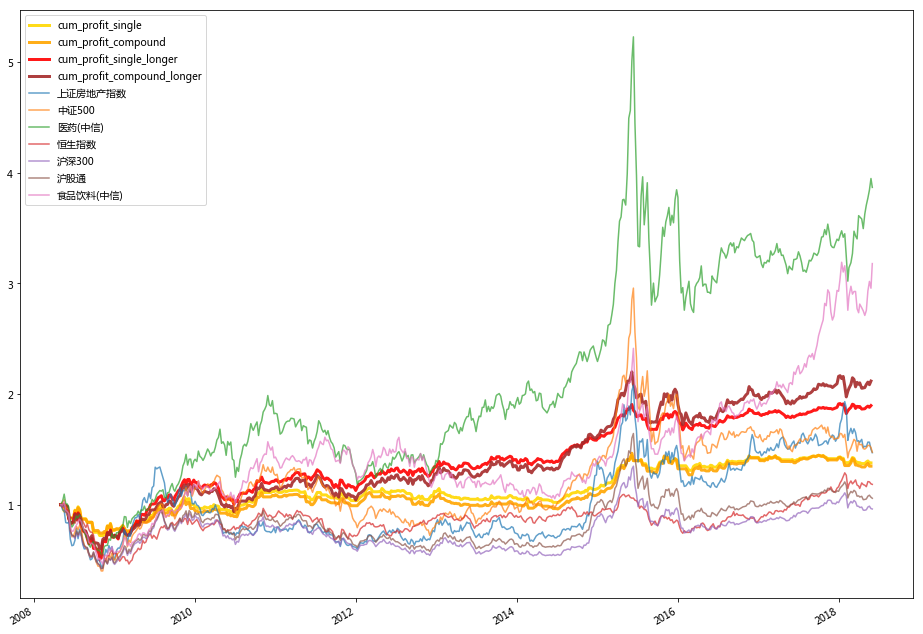

In [314]:
t['cum_profit_single'].plot(c='gold',alpha=0.9,figsize=(16,12),linewidth=3)
t['cum_profit_compound'].plot(c='orange',alpha=0.9,linewidth=3)
t['cum_profit_single_longer'].plot(c='red',alpha=0.9,linewidth=3)
t['cum_profit_compound_longer'].plot(c='brown',alpha=0.9,linewidth=3)

#plt.plot(pd.DataFrame(((t['Chg'][index]/100)+1).cumprod() for index in indexs).T,alpha=0.8)
#plt.twinx()
relative_index = pd.DataFrame((t['Close'][index]/t['Close'][index][0]) for index in indexs).T
for index in indexs:
    plt.plot(relative_index[index],alpha=0.7,label=index)
#plt.xlim((2008,2019))
#plt.xticks(np.arange(2008,2019))
plt.legend()
#
#t['Close','医药(中信)'] .plot(figsize=(10,7))
plt.savefig('E:\RH\performance.png',dpi=144)

In [277]:
t['worth'].where(t['worth']!=0)['2008']

Time,上证房地产指数,中证500,医药(中信),恒生指数,沪深300,沪股通,食品饮料(中信)
2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-09,-0.015512,NaN,NaN,-0.008958,NaN,NaN,NaN
2008-05-16,-0.003404,NaN,NaN,NaN,0.004915,NaN,NaN
2008-05-23,-0.037335,NaN,NaN,NaN,-0.022101,NaN,NaN
2008-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
def total_summary(t: pd.DataFrame, type = 'single'):
    #t['Capital'] = t['Close'][0] + t['Net Profit - Cum Net Profit']
    t['Capital'] = t['cum_profit_'+type]
    yearly_drawdown = dict()

    t['Year']=t.index.year
    t_group=t.groupby('Year')
    year_groups=[t_group.get_group(i) for i in t_group.groups.keys()]
    for year_group in year_groups:
        max_draw_down, temp_max_value = 0, 0
        start_date, end_date, current_start_date = 0, 0, 0
        continous = False # 是否连续
        for i in year_group.index:
            if temp_max_value < year_group['Capital'][i]:
                current_start_date = i
            temp_max_value = max(temp_max_value, year_group['Capital'][i])
            if max_draw_down>year_group['Capital'][i]/temp_max_value-1:
                if not continous: 
                    continous = True
                max_draw_down = year_group['Capital'][i]/temp_max_value-1
            else:
                if continous:
                    continous = False
                    start_date = current_start_date
                    end_date = i
        yearly_drawdown[year_group['Year'][i]] = max_draw_down, start_date, end_date            

    yearly_return = dict() # 记录年收益率
    max_draw_down, temp_max_value = 0, 0
    start_date, end_date, current_start_date = 0, 0, 0
    continous = False # 是否连续
    
    for i in t.index: 
        if temp_max_value < t['Capital'].shift(-1)[i]:
            current_start_date = i
        temp_max_value = max(temp_max_value, t['Capital'].shift(-1)[i])
        if max_draw_down>t['Capital'][i]/temp_max_value-1:
            if not continous: 
                continous = True
            max_draw_down = t['Capital'][i]/temp_max_value-1
        else:
            if continous:
                continous = False
                start_date = current_start_date
                end_date = i

        # 统计年收益率
        year = i.year
        yearly_return[year] = t['Capital'][i]

    total_return = t['Capital'].shift(1)[i]-1
    yearly_return = pd.Series(yearly_return) / t['Capital'][0]
    first_year = t.index[0].year, yearly_return[t.index[0].year]-1
    
    yearly_return = yearly_return.diff()
    yearly_return[first_year[0]] = first_year[1]
    return max_draw_down, start_date, end_date, total_return, pd.Series(yearly_return), yearly_drawdown, type

In [321]:
def summary(result):
    print('-------',result[-1], '------')
    print('总收益：%.2f% %' % (result[3]*100))
    print('最大回撤：%.2f% %' % (result[0]*100), '\t--------发生于',result[1].date(),'至',result[2].date())
    print('年化收益及回撤:')
    print('Year\t年化收益\t每年回撤')
    yearly_return,yearly_drawdown = result[4],result[5]
    for year in yearly_return.keys(): 
        print(year,'%.2f% %' %(yearly_return[year]*100), 
              '%.2f% %' % (yearly_drawdown[year][0]*100),
              '发生于 {} 至 {}'.format(yearly_drawdown[year][1].date(),yearly_drawdown[year][2].date()), sep='\t')
    print()

In [322]:
summary(total_summary(t, type='single'))
summary(total_summary(t, type='compound'))
summary(total_summary(t, type='single_longer'))
summary(total_summary(t, type='compound_longer'))

------- single ------
总收益：37.70%
最大回撤：-28.26% 	--------发生于 2008-04-30 至 2008-10-31
年化收益及回撤:
Year	年化收益	每年回撤
2008	-23.30%	-28.26%	发生于 2008-05-09 至 2008-10-31
2009	21.10%	-8.44%	发生于 2009-02-06 至 2009-02-27
2010	15.00%	-7.89%	发生于 2010-03-26 至 2010-07-16
2011	-9.14%	-8.36%	发生于 2011-04-08 至 2011-12-16
2012	8.05%	-9.59%	发生于 2012-03-02 至 2012-11-30
2013	-5.48%	-9.00%	发生于 2013-01-11 至 2013-07-19
2014	8.26%	-4.38%	发生于 2014-04-04 至 2014-07-11
2015	20.62%	-8.63%	发生于 2015-06-05 至 2015-09-18
2016	7.57%	-3.03%	发生于 2016-01-08 至 2016-02-26
2017	0.17%	-3.06%	发生于 2017-03-17 至 2017-06-23
2018	nan%	-4.21%	发生于 2018-01-05 至 2018-04-20

------- compound ------
总收益：34.78%
最大回撤：-26.04% 	--------发生于 2008-04-30 至 2008-10-31
年化收益及回撤:
Year	年化收益	每年回撤
2008	-22.72%	-26.04%	发生于 2008-05-09 至 2008-10-31
2009	17.12%	-8.85%	发生于 2009-11-13 至 2009-12-18
2010	14.54%	-7.68%	发生于 2010-03-26 至 2010-07-16
2011	-9.95%	-9.40%	发生于 2011-04-08 至 2011-12-16
2012	7.62%	-10.81%	发生于 2012-03-02 至 2012-11-30
2013	-5.94%	-9.91%	发生于 2013-01-11

In [312]:
t['w'].describe()
#持有较多的是：医药(中信)，沪深300，上证房地产指数，食品饮料(中信)

Time,医药(中信),沪深300,中证500,沪股通,上证房地产指数,食品饮料(中信),恒生指数
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.071567,0.044487,0.073501,0.004513,0.089620,0.053514,0.043843
std,0.137004,0.113468,0.138329,0.038561,0.147932,0.122488,0.112768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
max,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [313]:
t['longerw'].describe()

Time,食品饮料(中信),上证房地产指数,中证500,医药(中信),恒生指数,沪深300,沪股通
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.081238,0.163121,0.128304,0.108317,0.085106,0.090909,0.005803
std,0.143246,0.166790,0.162349,0.156270,0.145488,0.148598,0.043638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000
max,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [326]:
t[['w','longerw','cum_profit_single','cum_profit_single_longer']].replace(0,np.nan).to_excel(r'E:\RH\position.xlsx')